In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = "YlOrRd"

In [2]:
def add_column(df, name, series):
    df[name] = series
    return df

In [3]:
import os, glob
csv_files = glob.glob(os.path.join("./data", "*.csv"))
df = pd.concat((add_column(pd.read_csv(path, converters={
    "genre": lambda x: x.replace("short story", "short stories")
}), "year_read", int(os.path.splitext(os.path.basename(path))[0])) for path in csv_files), ignore_index=True).rename(columns={"country of origin": "country"})
df["year"] = pd.to_numeric(df["year"])

In [4]:
df

,author,title,year,genre,country,pages,year_read
0,Thomas Böhm; Carsten Pfeiffer,Die Wunderkammer der Deutschen Sprache,2019,linguistics,Germany,304,2020
1,Friedrich Nietzsche,Der griechische Staat,1872,philosophy,Germany,53,2020
2,Friedrich Nietzsche,Philosophie im tragischen Zeitalter der Griechen,1873,philosophy,Germany,82,2020
3,Friedrich Nietzsche,Wissenschaft und Weisheit im Kampfe,1875,philosophy,Germany,23,2020
4,Theodore Kaczynski,Industrial Society and its Future,1995,politics,USA,34,2020
...,...,...,...,...,...,...,...
332,Rudolf Meringer,Indogermanische Sprachwissenschaft,1903,linguistics,Austria,151,2023
333,Georg Steindorff,Koptische Grammatik,1904,linguistics,Germany,350,2023
334,Ernst Doblhofer,Die Entzifferung alter Schriften und Sprachen,2000,linguistics,Austria,350,2023
335,Walter Moers,Die Stadt der Träumenden Bücher,2004,novel,Germany,455,2023


In [5]:
df.pivot_table(values="pages", index=["year_read", "genre"], aggfunc=np.sum).unstack().fillna(0).astype(int).transpose().style.background_gradient(axis="rows", cmap=cm)

/tmp/nix-shell-240585-0/ipykernel_412663/1286576343.py:1: FutureWarning: The provided callable <function sum at 0x7fe9b57d4cc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values="pages", index=["year_read", "genre"], aggfunc=np.sum).unstack().fillna(0).astype(int).transpose().style.background_gradient(axis="rows", cmap=cm)


In [6]:
df.pivot_table(values="pages", index=["author"], aggfunc=np.sum).sort_values(by="pages", ascending=False).head(10)

/tmp/nix-shell-240585-0/ipykernel_412663/1081841235.py:1: FutureWarning: The provided callable <function sum at 0x7fe9b57d4cc0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values="pages", index=["author"], aggfunc=np.sum).sort_values(by="pages", ascending=False).head(10)


,pages
author,
Rolf Schilling,4076
Ayn Rand,2791
Friedrich Nietzsche,2168
J. R. R. Tolkien,2107
Rainer Maria Rilke,1938
Walther Kranz,1201
Thorwald Dethlefsen,1188
John Henry Mackay,1174
H. P. Lovecraft,1049


<Axes: xlabel='genre'>

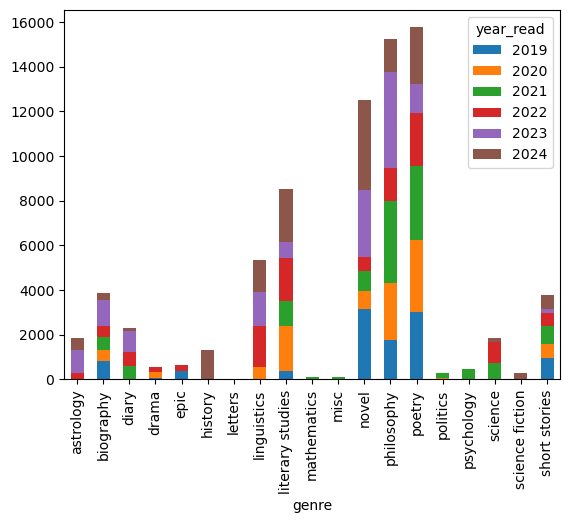

In [7]:
df.groupby(["genre", "year_read"])["pages"].sum().unstack().plot.bar(stacked=True)

<Axes: xlabel='country'>

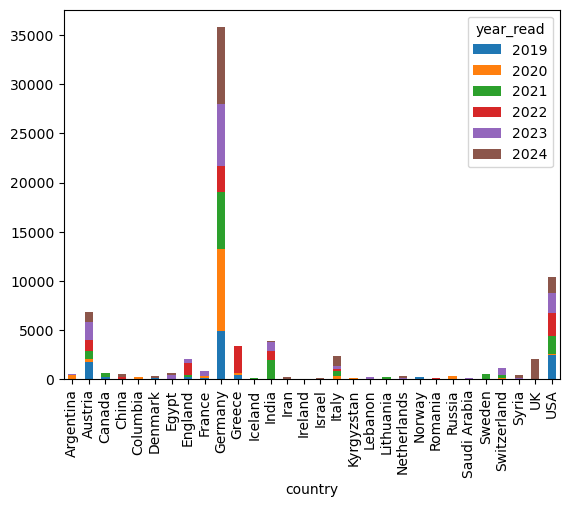

In [8]:
df.groupby(["country", "year_read"])["pages"].sum().unstack().plot.bar(stacked=True)

<Axes: xlabel='country', ylabel='year'>

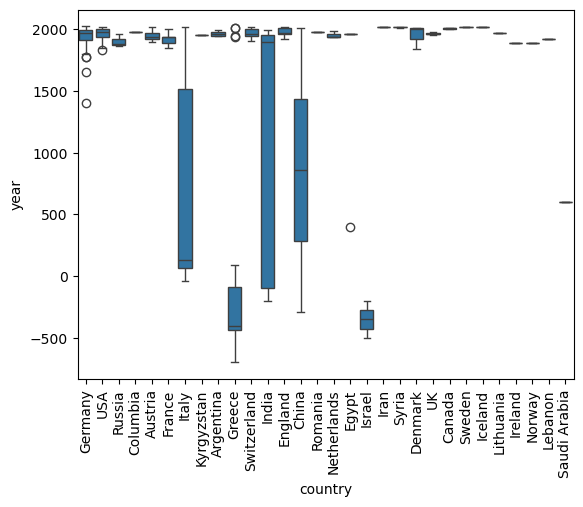

In [9]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x="country", y="year")

<Axes: xlabel='genre', ylabel='year'>

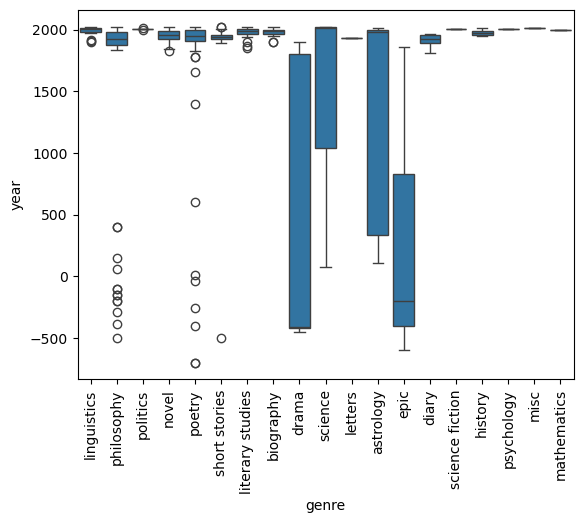

In [10]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x="genre", y="year")

<Axes: xlabel='year_read'>

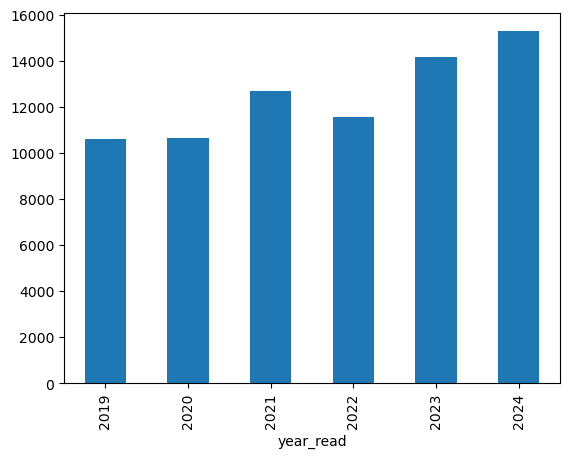

In [11]:
df.groupby("year_read")["pages"].sum().plot.bar(stacked=True)

<Axes: xlabel='year_read', ylabel='pages'>

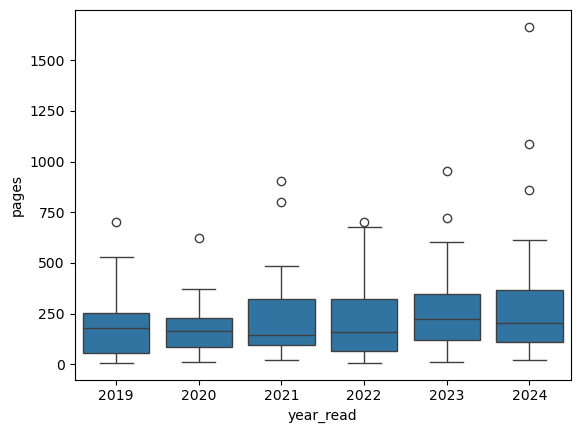

In [12]:
sns.boxplot(data=df, x="year_read", y="pages")

<Axes: xlabel='year_read', ylabel='year'>

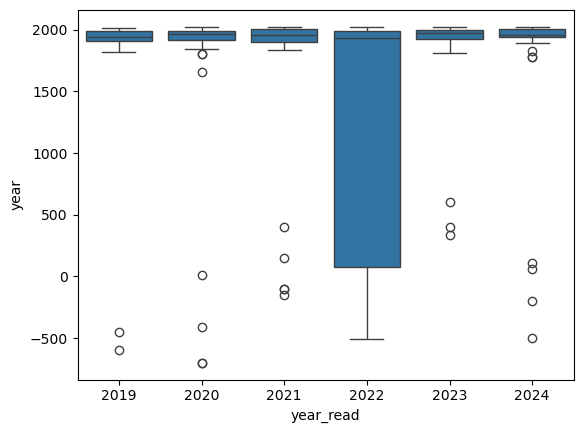

In [13]:
sns.boxplot(data=df, x="year_read", y="year")

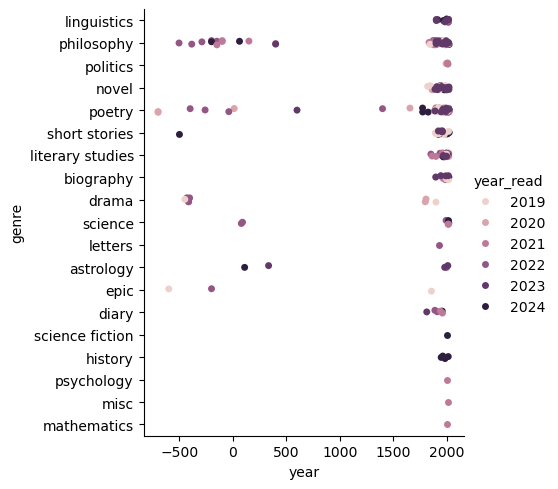

In [14]:
sns.catplot(data=df, x="year", y="genre", hue='year_read')

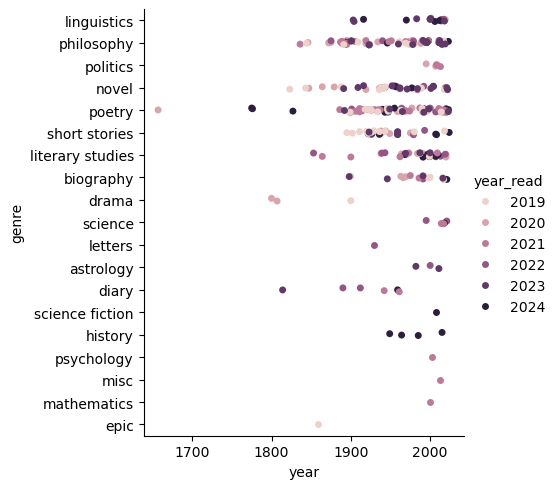

In [15]:
sns.catplot(data=df[df["year"] > 1600], x="year", y="genre", hue='year_read')

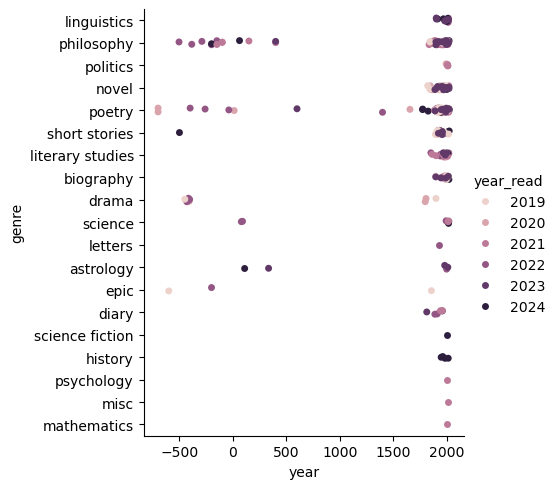

In [16]:
sns.catplot(data=df, x="year", y="genre", hue='year_read')

In [17]:
df[["country", "genre"]].value_counts().head(10)

country  genre           
Germany  poetry              54
         philosophy          39
         literary studies    23
         novel               12
Austria  short stories        9
Germany  biography            8
India    philosophy           8
Germany  short stories        7
USA      philosophy           7
         novel                7
Name: count, dtype: int64

In [18]:
df.groupby(["country", "genre"])["pages"].sum().sort_values(ascending=False).head(10)

country  genre           
Germany  poetry              9078
         philosophy          8210
         literary studies    5859
         novel               3611
USA      novel               3068
India    philosophy          2402
UK       novel               2107
Austria  poetry              1922
Germany  diary               1738
         linguistics         1702
Name: pages, dtype: int64